<a href="https://colab.research.google.com/github/Collokd/Titanic-Survival-Classification-Spam-Email-Classification/blob/master/Week_9_Independent_Project_Collins_Kemboi(Titanic_Survival_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - IP Week 9

## 1. Defining the Question

### a) Specifying the Question

In this project we will attempt to predict survival of passengers in the famous Titanic ship that was operated by the White Star Line and sank in the North Atlantic Ocean in the early morning hours of 15 April 1912.

### b) Defining the Metric for Success
1. Develop a predicting titanic survival model that is accurate.


### d) Recording the Experimental Design

1.   Data reading, cleaning and preparation
2.   Perform EDA
3.   Split dataset into Training and Test Subset
4.   Making predictions and assessing accuracy of our models


### e) Data Relevance

The dataset for this project can be found from the below links;
1. [Train](https://archive.org/download/train5_202002/train%20%285%29.csv)
2. [Test](https://archive.org/download/test1_202002/test%20%281%29.csv)






## 2. Reading the Data

In [ ]:
# Loading the necessary libraries
# 
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV



In [ ]:
# Loading the data

data1 = pd.read_csv("test (1).csv")

data2 = pd.read_csv("train (5).csv")

## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset

print(data1.shape)

print(data2.shape)

(418, 11)
(891, 12)


In [ ]:
# Previewing our Test dataset
#
data1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# Previewing our Train dataset
#
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Checking information from our test dataset

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
# Checking information from our test dataset

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 4. External Data Source Validation

### a.Validation

## 5. Tidying the Dataset

In [ ]:
# Previewing columns on our Test dataset
#
data1.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Previewing columns on our Train dataset
#
data1.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Checking for duplicate values in the test dataset.
#
data1.duplicated().values.any()

False

In [ ]:
# Checking for duplicate values in the train dataset.
#
data2.duplicated().values.any()

False

In [ ]:
# Checking for null values in both test and train datasets

data1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
data2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# We note we having missing data on the Age column which is important for comparison in our analysis. 
# We will therefore compute measure of central tendancy on our data to see hoe best we will dedal with the data.
# Checking description of our two datasets.

data1.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
data2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Test dataset MCT

print(data1.Age.mode())
print(data1.Age.median())

0    21.0
1    24.0
dtype: float64
27.0


In [ ]:
# Train dataset MCT

print(data2.Age.mode())
print(data2.Age.median())

0    24.0
dtype: float64
28.0


In [ ]:
# We will drop column name Cabin from both dataset as it also contains null values and is not important for our analysis

data1 = data1.drop('Cabin', axis=1)

data2 = data2.drop('Cabin', axis=1)

In [ ]:
data1.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
data2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
# We will fill the missing data in the Age columns with the median value

# data1_clean = data1['Age'].fillna((data1.Age.median()), inplace=True)


In [ ]:
# data2_clean = data2['Age'].fillna((data2.Age.median()), inplace=True)

## 6. Checking and dealing with Outliers

In [ ]:
data2.shape

(891, 11)

In [ ]:
data1.shape

(418, 10)

In [ ]:
data = data2

In [ ]:
data.shape

(891, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
# encode = LabelEncoder()

# data['sex'] = encode.fit_transform(data['sex'])




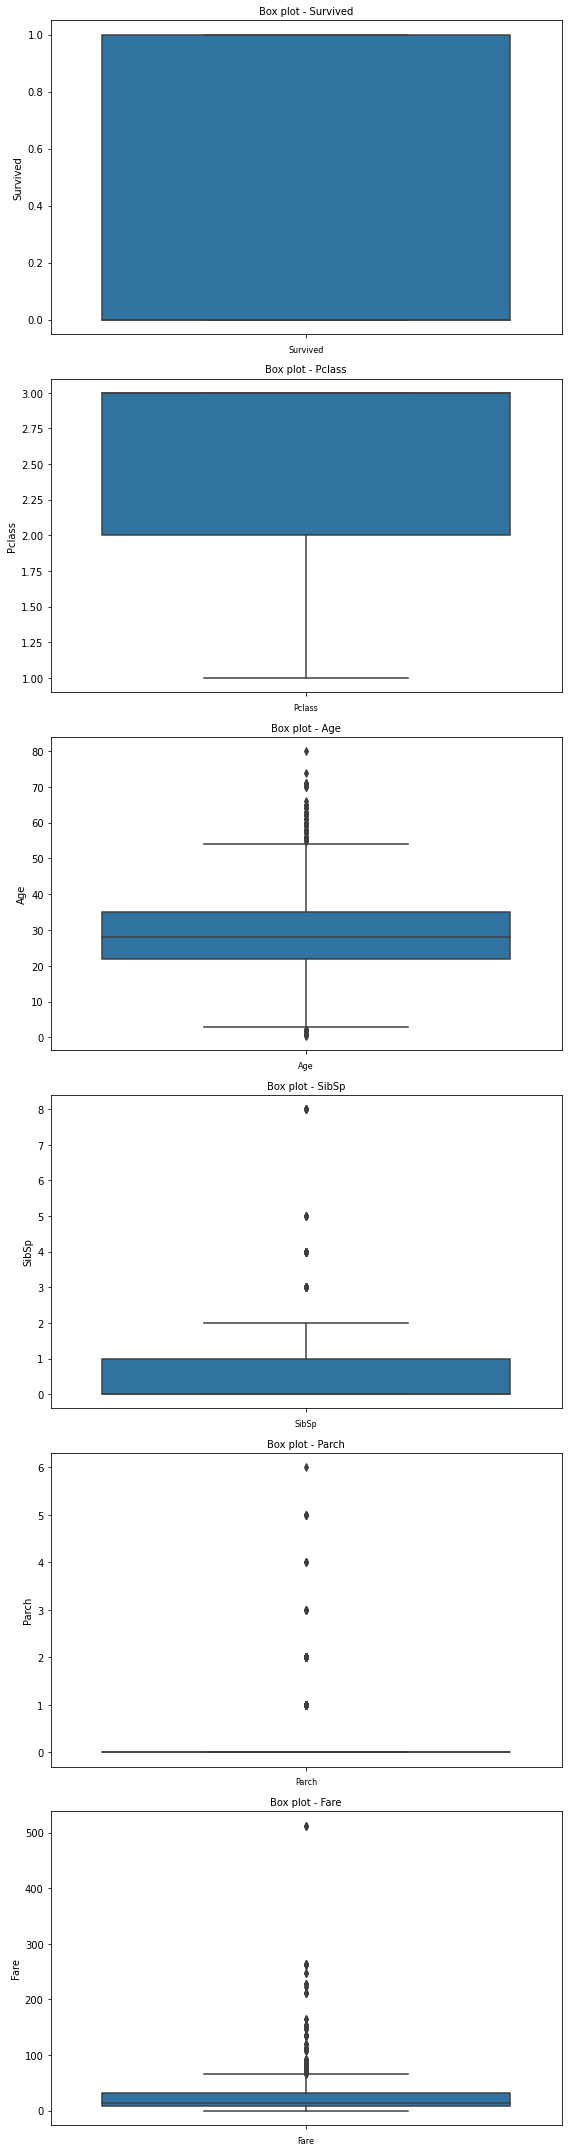

In [ ]:

# Checking for outliers from our numerical dataset

import seaborn as sns

col_names = numeric_clmns = data.dtypes[data.dtypes != "object" ].index

fig, ax = plt.subplots(len(col_names), figsize=(8,30))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=data[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.tight_layout()
plt.show()

## 6. Exploratory Analysis

> ## i) Univariate Analysis

In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

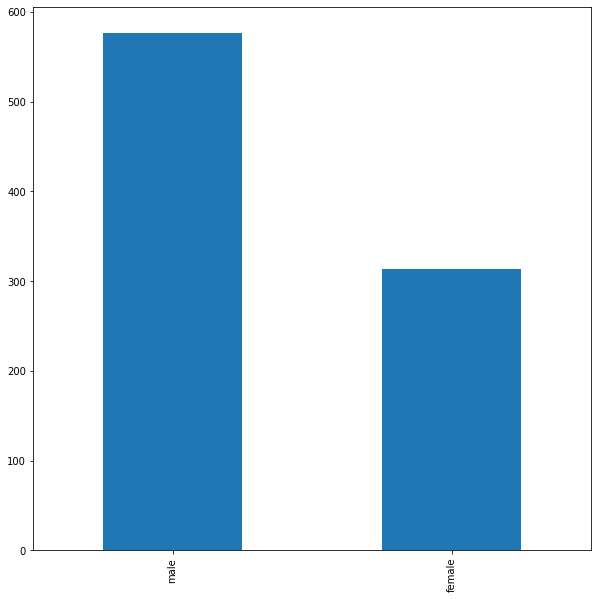

In [ ]:
# Ploting the univariate summaries and recording our observations
#
plt.figure(figsize=(10,10))
data['Sex'].value_counts().plot.bar()

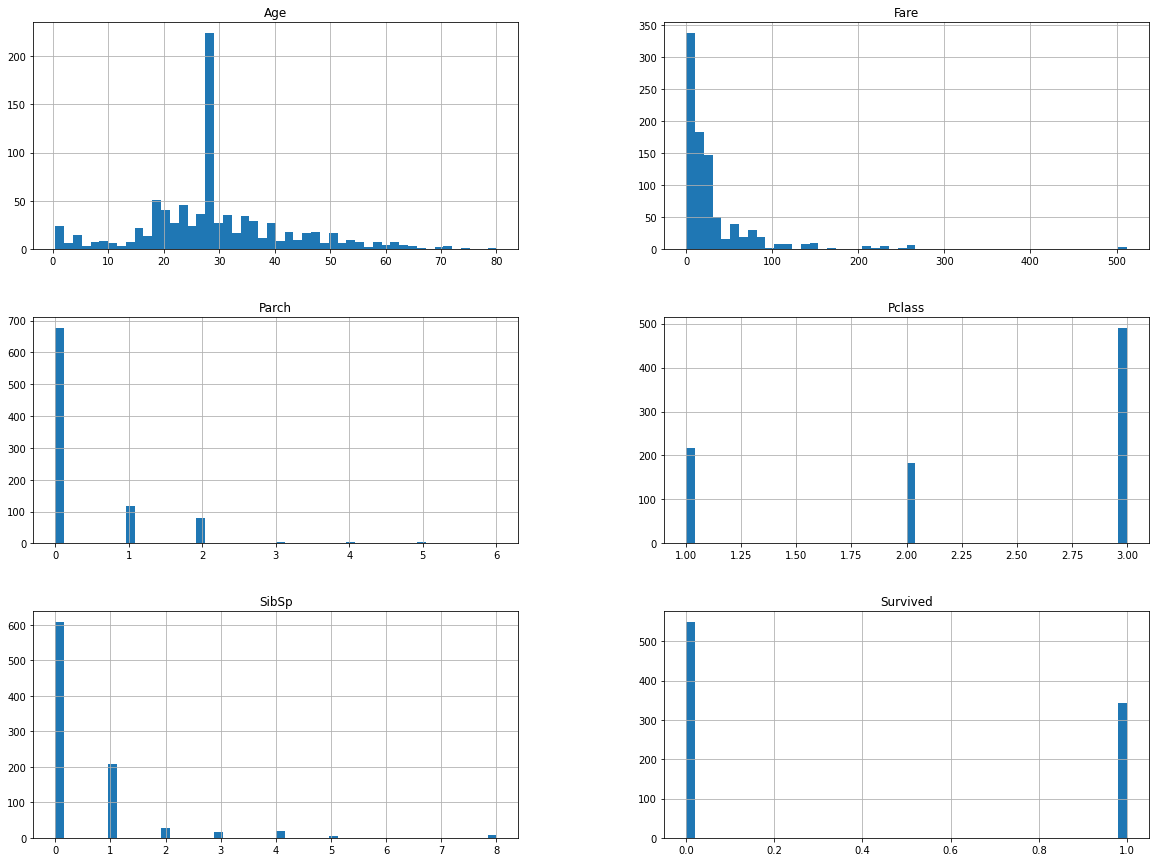

In [ ]:
# Plotting distribution of our Train dataset

# data = data.drop('PassengerId', axis=1)

data.hist(bins=50,figsize=(20,15))
plt.show()

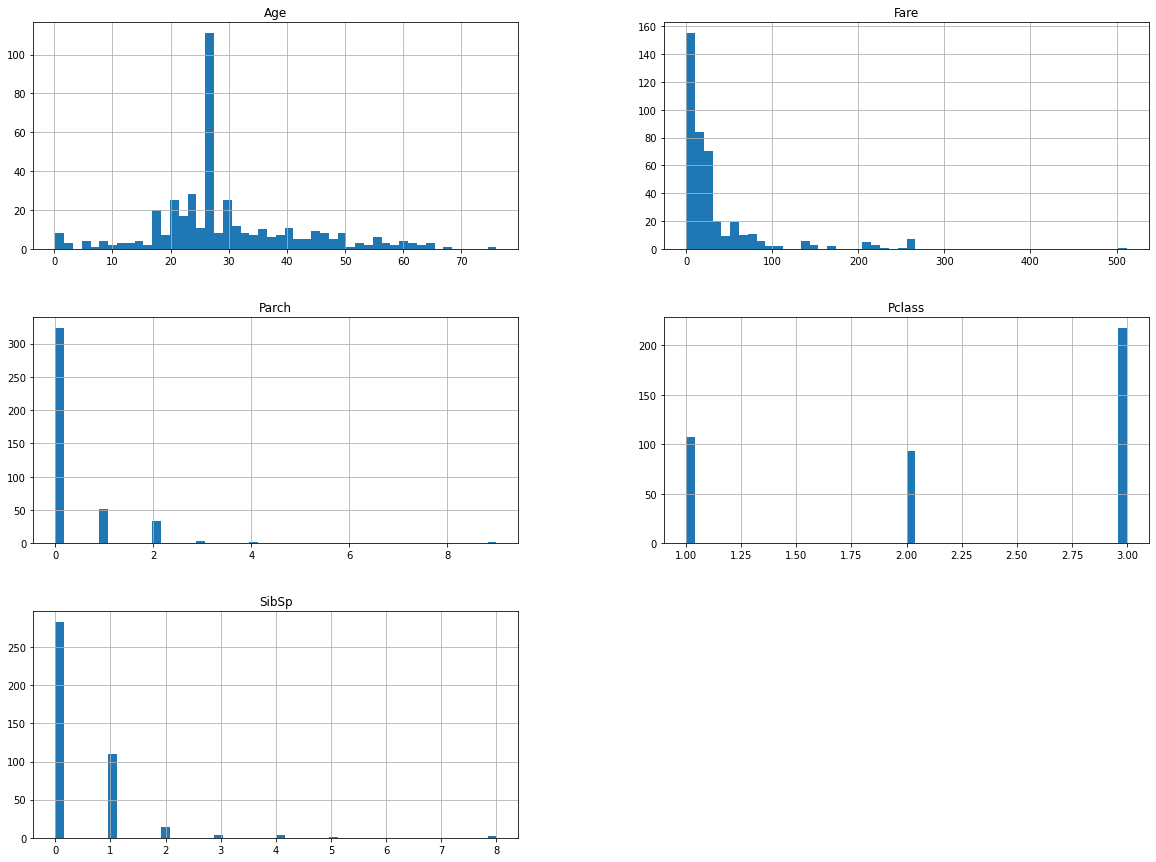

In [ ]:
# Plotting distribution of our Test dataset

# data1 = data1.drop('PassengerId', axis=1)

data1.hist(bins=50,figsize=(20,15))
plt.show()

> ## ii) Bivariate Analysis


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

data['Sex'] = encode.fit_transform(data['Sex'])


Text(0.5, 1.0, 'Pairplot of Numeric variables.')

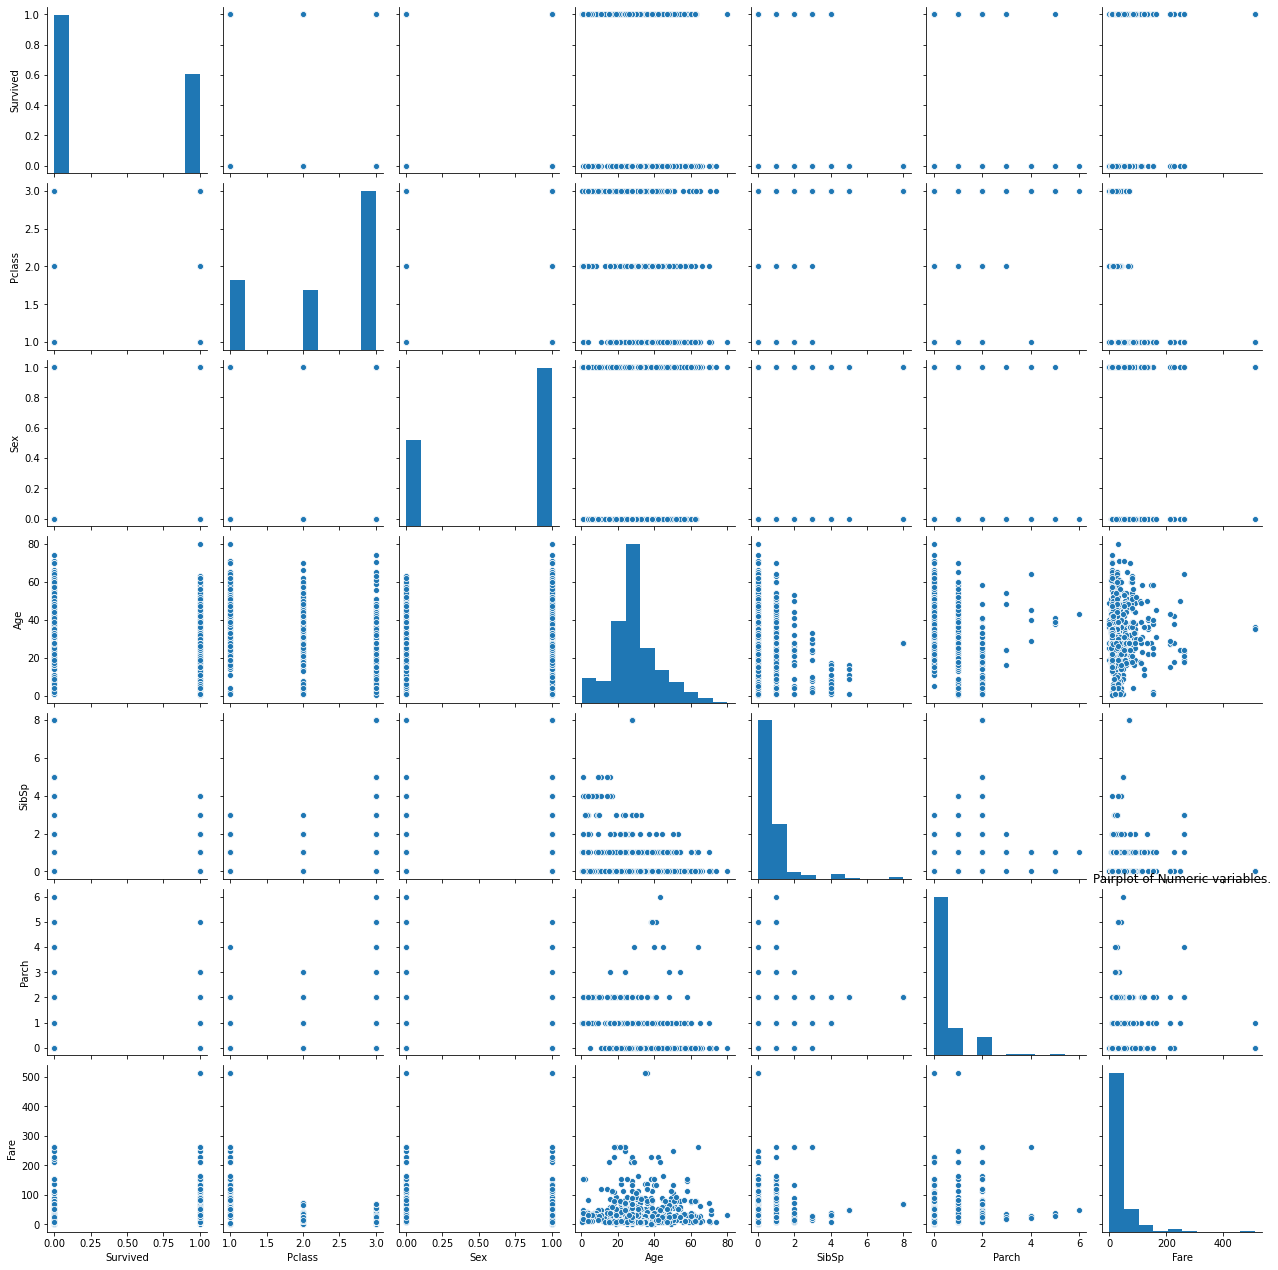

In [ ]:
# drawing scatter plots on numeric variables to visualize any correlation
#
sns.pairplot(data)
plt.title("Pairplot of Numeric variables.")

Text(0.5, 1.0, 'Correlation between variables')

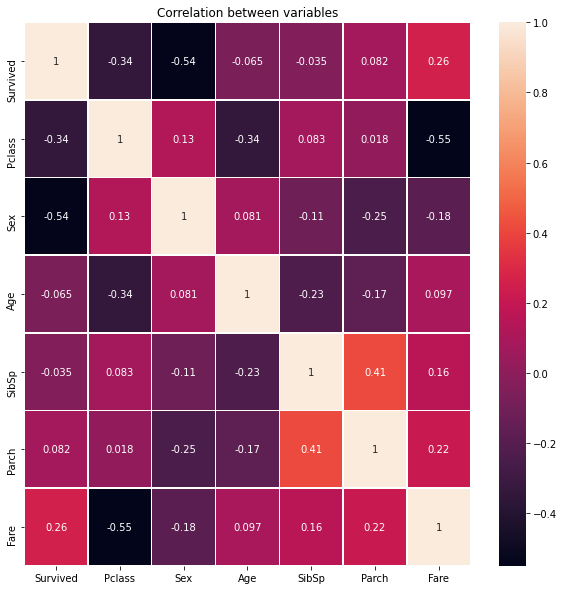

In [ ]:
# Create a correlation matrix

corrMatrix = data.corr()
corrMatrix

# Vizualise the correlation matrix using a heat map

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corrMatrix, annot=True,  linewidths=.5, ax=ax)
plt.title('Correlation between variables')

> # **Implementing the Solution**

> ## **K-Nearest Neighbor**

## **KNN**

In [ ]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [ ]:
# # Encoding categorical column Embarked

# data['Embarked'] = encode.fit_transform(data['Embarked'])


In [ ]:
# Getting dummies for categorical data

data = pd.get_dummies(data, columns=['Sex'])

In [187]:
data.head(5)

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_0,Sex_1
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,1,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,0,1


In [ ]:
# sex

# male = 0

# female = 1

In [203]:
# We define our test featres and target variable 

X = data[[ 'Pclass','Age', 'SibSp', 'Parch','Fare', 'Sex_0', 'Sex_1']].values

y = data[['Survived']].values

In [204]:
X

array([[ 3.    , 22.    ,  1.    , ...,  7.25  ,  0.    ,  1.    ],
       [ 1.    , 38.    ,  1.    , ..., 71.2833,  1.    ,  0.    ],
       [ 3.    , 26.    ,  0.    , ...,  7.925 ,  1.    ,  0.    ],
       ...,
       [ 3.    , 28.    ,  1.    , ..., 23.45  ,  1.    ,  0.    ],
       [ 1.    , 26.    ,  0.    , ..., 30.    ,  0.    ,  1.    ],
       [ 3.    , 32.    ,  0.    , ...,  7.75  ,  0.    ,  1.    ]])

In [205]:
X.shape

(891, 7)

In [206]:
y.shape

(891, 1)

# **KNN Classification with a split ration 80:20**

In [207]:
# Splitting our data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.2, random_state = 0)

In [208]:
#fitting and scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [209]:
#where K = 5

from sklearn.neighbors import KNeighborsClassifier

knnclassifier = KNeighborsClassifier(n_neighbors=5)

knnclassifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [211]:
# Predict based on the model we've trained

y_pred = knnclassifier.predict(X_test)


In [213]:
# Evaluating the performance of our model as follows

from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, y_pred)



array([[97, 13],
       [22, 47]])

In [215]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



# **KNN Classification with a split ration 70:30**

In [218]:
#KNN classifier on 70% training dataset and 30% test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)

Model = KNeighborsClassifier()

Model.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [219]:
# Prediction

y_pred = Model.predict(X_test)

In [220]:
# Evaluation

confusion_matrix(y_test, y_pred)

array([[135,  33],
       [ 38,  62]])

In [221]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       168
           1       0.65      0.62      0.64       100

    accuracy                           0.74       268
   macro avg       0.72      0.71      0.71       268
weighted avg       0.73      0.74      0.73       268



In [222]:
# Accuracy score

accuracy_score(y_pred,y_test)

0.7350746268656716

# **KNN Classification with a split ration 60:40**

In [225]:
#KNN classifier on 60% training dataset and 40% test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state = 0)

Model2 = KNeighborsClassifier()

Model2.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [226]:
# Prediction

y_pred = Model2.predict(X_test)

In [227]:
# Evaluation

confusion_matrix(y_test, y_pred)

array([[178,  43],
       [ 58,  78]])

In [228]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       221
           1       0.64      0.57      0.61       136

    accuracy                           0.72       357
   macro avg       0.70      0.69      0.69       357
weighted avg       0.71      0.72      0.71       357



In [229]:
# Accuracy score

accuracy_score(y_pred,y_test)

0.7170868347338936